# Wondering who are the top billionaires of the world?
This project is the analysis of top billionaires of the world in 2021. The data contains name, their net worth, country they reside, source of their income, their age and industry of job they are working. Can you guess top industry in 2021?

The data came from kaggle in this link [link text](https://www.kaggle.com/roysouravcu/forbes-billionaires-of-2021), which ultimately came from web scraping of [Forbes real time billionaire list](https://www.forbes.com/real-time-billionaires/#231a1cda3d78). 

In [ ]:
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
import geopandas

billionaire = pd.read_csv('Billionaire.csv')
billionaire['NetWorth'] = billionaire['NetWorth'].str.replace('\$|B', '').astype(float) * 1000000000

# Exploring top 10 billionaires

In [3]:
top10 = billionaire[:10]
top10

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,1.770000e+11,United States,Amazon,1,57.0,Technology
1,Elon Musk,1.510000e+11,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,1.500000e+11,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,1.240000e+11,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,9.700000e+10,United States,Facebook,5,36.0,Technology
5,Warren Buffett,9.600000e+10,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,9.300000e+10,United States,software,7,76.0,Technology
7,Larry Page,9.150000e+10,United States,Google,8,48.0,Technology
8,Sergey Brin,8.900000e+10,United States,Google,9,47.0,Technology
9,Mukesh Ambani,8.450000e+10,India,diversified,10,63.0,Diversified


Most of these name are the names we are already familiar in the news. Interestingly, most of these billionaires came from United states and 6 out of 10 of these billionaires are working in Technology industry

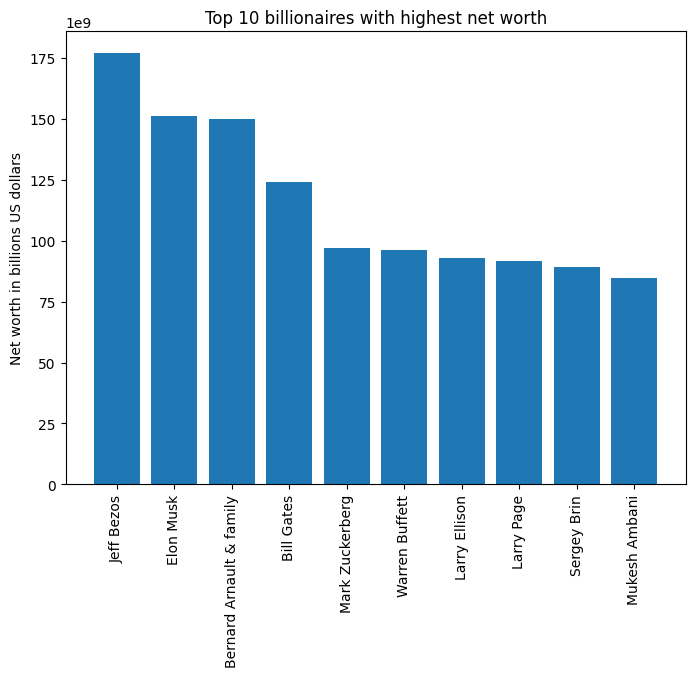

In [39]:
plt.figure(figsize=(8,6), dpi=100)
plt.bar(x=top10['Name'],
        height=top10['NetWorth'])
plt.title('Top 10 billionaires with highest net worth')
ax = plt.gca()
ax.ticklabel_format(axis='y', scilimits=[9, 9])
plt.ylabel('Net worth in billions US dollars')
plt.xticks(rotation=90)
plt.show()

It is interesting seeing that the owner of Louis Vuitton has close net worth to Elon Musk, the ironman of modern time. Perhaps the value of brand name industry is more than we anticipated.

# Top industry of these billionaires

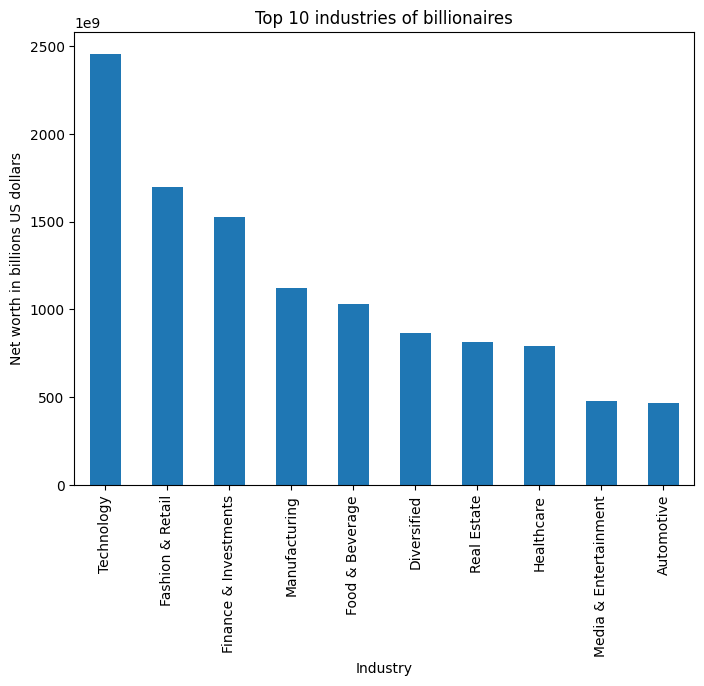

In [40]:
top_industry = billionaire.groupby('Industry').agg({'NetWorth':'sum'})
top_industry = top_industry.sort_values('NetWorth', ascending=False)
top_industry = top_industry['NetWorth'][:10]

plt.figure(figsize=(8,6), dpi=100)
top_industry.plot(kind='bar')
ax = plt.gca()
ax.ticklabel_format(axis='y', scilimits=[9, 9])
plt.title('Top 10 industries of billionaires')
plt.ylabel('Net worth in billions US dollars')
plt.show()

It is obvious that most of the Mega trend is somehow related to technology industry. Fashion & Retail is, however, a surprise that it contributes more than even finance & investments. This may be an answer to the question of why the owner of Louis Vuitton has such high net worth.

<Figure size 800x600 with 0 Axes>

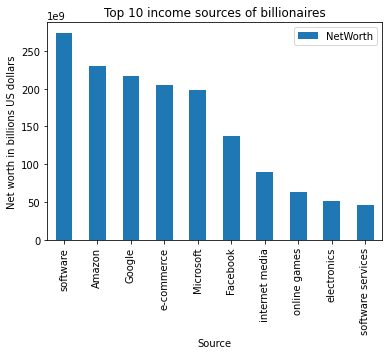

In [41]:
top_tech = billionaire[billionaire['Industry'] == 'Technology']
top_tech = top_tech.groupby('Source').agg({'NetWorth': 'sum'})
top_tech = top_tech.sort_values('NetWorth', ascending=False)[:10]

plt.figure(figsize=(8,6), dpi=100)
top_tech.plot(kind='bar')
ax = plt.gca()
ax.ticklabel_format(axis='y', scilimits=[9, 9])
plt.title('Top 10 income sources of billionaires')
plt.ylabel('Net worth in billions US dollars')
plt.show()

Focusing closely on a technology industry, which company is the giants income source? The highest net worth is "software", which is a general terms of software service provider. If one consider only private company, the biggest source of income is Amazon which followed by Google.

# How old are these billionaires?

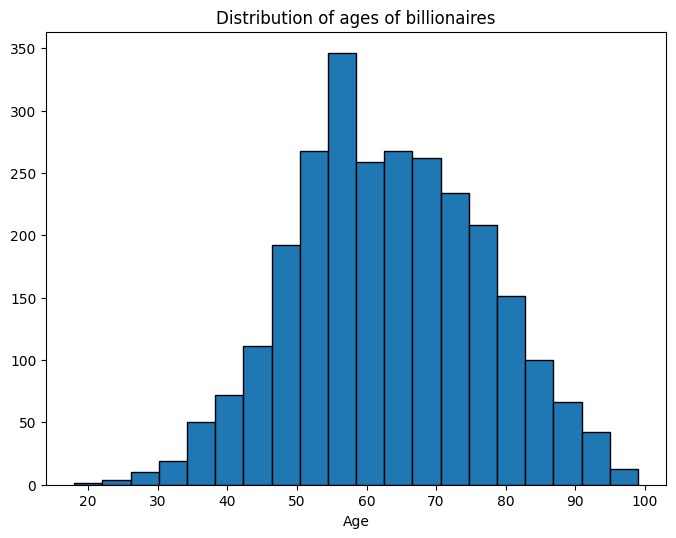

In [38]:
plt.figure(figsize=(8,6), dpi=100)
plt.hist(billionaire['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.title('Distribution of ages of billionaires')
plt.show()

With this chart, it can be seen that the majority of the billionaires are in a range between 50 to 70 years old. Interestingly, the youngest in the list are still in their twenties. Still not too late for you guys.

# Where are they living?

In [25]:
country = billionaire.groupby('Country').agg({'NetWorth':'sum'}).reset_index()
country['Country'] = country['Country'].str.replace('United States','United States of America')
country_map = geopandas.GeoDataFrame(country)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
country_map = country_map.merge(world, left_on='Country', right_on='name')

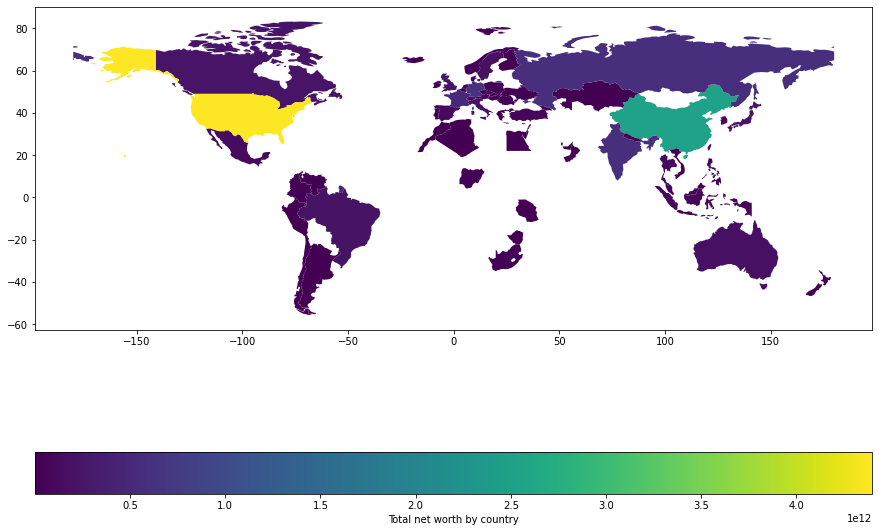

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
country_map.plot(column='NetWorth', ax=ax, legend=True,
                 legend_kwds={'label': "Total net worth by country",
                              'orientation': "horizontal"})

With this visualization, USA is the top country that these billionaires are living. This is interesting enough to further explore that whether the country has supporting policy for businessmen and investors to persuade them to start the business there. China is a second country in the chart and the only country in the region that contribute to outstanding amount of billionaire's net worth. No wonder why the trade war between these two countries pose significant effect on global scale!